# Week 3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib
import pandas as pd
import seaborn as sns; sns.set()

## Deriving the gardient of the logistic regression cost function

##### First I'll derive the sigmoid function
$S(z)=\dfrac{1}{1+e^{-z}}$=>
The quatient rule =>
$\dfrac{dS(z)}{dz}=\dfrac{-(-e^{-z})}{(1+e^{-z})^2}=\dfrac{e^{-z}}{(1+e^{-z})^2}=\dfrac{-1+1+e^{-z}}{(1+e^{-z})^2}=\dfrac{-1+(1+e^{-z})}{(1+e^{-z})^2}=\dfrac{-1}{(1+e^{-z})^2}+\dfrac{1+e^{-z}}{(1+e^{-z})^2}=\dfrac{-1}{(1+e^{-z})^2}+\dfrac{1}{1+e^{-z}}=-S(z)S(z)+S(z)=S(z)(1-S(z))$

##### I'll use the chain rule to derive the hypothesis with respect to theta

$h_\theta(x)=S(\theta^Tx)$
The chain rule=>
$\dfrac{\partial h_\theta(x)}{\partial \theta}=S'(\theta^Tx)x=S(\theta^Tx)(1-S(\theta^Tx))x=h_\theta(x)(1-h_\theta(x))x$

##### Using the above solutions I'll derive the cost function with respect to theta

$J(\theta)=-\frac{1}{m}\displaystyle \sum_{i=1}^m[(y\log h)+(1-y)\log(1-h)]$

$P(\theta)=(y\log h)+(1-y)\log(1-h)$

##### I'll derive each sum component individualy using the log derivative and the chain rule
$\log'(x)=\dfrac{1}{x}$

$\dfrac{\partial y\log{h}}{\partial h}=\dfrac{y}{h}$

$\dfrac{\partial (1-y)\log(1-h)}{\partial h}=-\dfrac{1-y}{1-h}$

$\dfrac{\partial P(\theta)}{\partial h}=\dfrac{\partial [(y\log h)+(1-y)\log(1-h)]}{\partial h}=\dfrac{y}{h}-\dfrac{1-y}{1-h}=\dfrac{y(1-h)-(1-y)h}{h(1-h)}=\dfrac{y-yh-h+yh}{h(1-h)}=\dfrac{y-h}{h(1-h)}$

$\dfrac{\partial P(\theta)}{\partial \theta}=\dfrac{\partial P(\theta)}{\partial h}\dfrac{\partial h_\theta(x)}{\partial \theta}=\dfrac{y-h}{h(1-h)}h(1-h)x=(y-h)x$

##### Putting it all together
$\dfrac{\partial J(\theta)}{\partial \theta}=-\dfrac{1}{m}(X^T(y-h))=\dfrac{1}{m}(X^T(h-y))$



In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    '''Computes the cost function for logistic regression'''
    m = y.shape[0]
    h = sigmoid(np.dot(X, theta.T))
    cost = -1 * (1/m) * np.sum(np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))
    return cost

def cost_function_gradient(X, y, theta):
    '''Computes the derivative of the cost function'''
    h = sigmoid(np.dot(X, theta.T))
    m = y.shape[0]
    gradient = (1/m) * np.dot(X.T, (h - y))
    return gradient

def gradient_descent(X, y, theta, alpha, iterations):
    '''Minimizes theta using the gradient
    of the logistic regression cost function'''
    J_history = []
    for i in range(iterations):
        grad = cost_function_gradient(X, y, theta)
        theta = theta - (alpha * grad)
        cost = cost_function(X, y, theta)
        J_history.append(cost)
    
    return theta, J_history

def normalize(X):
    '''Normalizes X without the column of ones'''
    means = np.mean(X, axis = 0)
    stds = np.std(X, axis = 0)
    X_norm = (X - means) / stds
    
    return X_norm

def predict(a, b, theta, X):
    '''predicts the probability of admition based on
    score in test a and b'''
    a_norm = (a - np.mean(X[:,0])) / np.std(X[:,0])
    b_norm = (b - np.mean(X[:,1])) / np.std(X[:,1])
    x = np.array([1, a_norm, b_norm])
    
    return sigmoid(np.dot(x, theta))

def get_boundry_line_2d(X_norm, X, theta):
    '''Gets two points on the boundry line in order to plot it,
    scales the points to original range'''
    x_norm = np.array([np.min(X_norm[:,1]), np.max(X_norm[:,1])])
    y_norm = (-1*(theta[0] + theta[1]*x_norm))/theta[2]
    x_estimates = x_norm * np.std(X[:,0]) + np.mean(X[:,0])
    y_estimates = y_norm * np.std(X[:,1]) + np.mean(X[:,1])
    return x_estimates, y_estimates

### The exercise

In [3]:
# Load the data
df = pd.read_csv('Andrew-Ng-ML-Course-Assignments/machine-learning-ex2/ex2/ex2data1.txt', names = ['A_score','B_score','admitted'])
X = df[['A_score', 'B_score']].values
y = df['admitted'].values

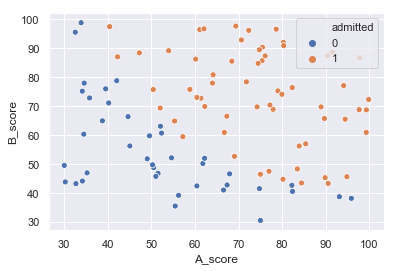

In [4]:
# Plot the data
sns.scatterplot(x='A_score', y='B_score', hue='admitted', data = df)

In [5]:
X_norm = normalize(X)
# Add a column of ones to X
m, n = X.shape
X_norm = np.hstack([np.ones((m,1)), X_norm])
theta = np.zeros(n+1)
cost = cost_function(X_norm, y, theta)
grad = cost_function_gradient(X_norm, y, theta)
print('cost: {}, gradient: {}'.format(cost, grad))

cost: 0.6931471805599452, gradient: [-0.1        -0.28122914 -0.25098615]


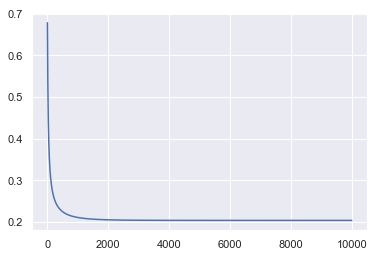

In [6]:
# Lets try my own gradient descent
alpha = 0.1
iterations = 10000
theta, J_hist = gradient_descent(X_norm, y, theta, alpha, iterations)
plt.plot(J_hist)

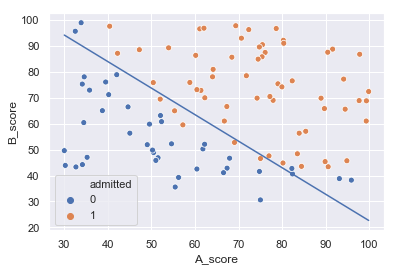

In [7]:
sns.scatterplot(x = df['A_score'], y = df['B_score'], hue = df['admitted'], data = df)
x_estimates, y_estimates = get_boundry_line_2d(X_norm, X, theta)
plt.plot(x_estimates, y_estimates)

In [8]:
predict(45, 85, theta, X)

0.7760366462788343